In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/11

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/11


In [0]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
# 실제는, 목적변수 y_train이 전혀 필요 없다.

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [5]:
# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape

(60000, 28, 28, 1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


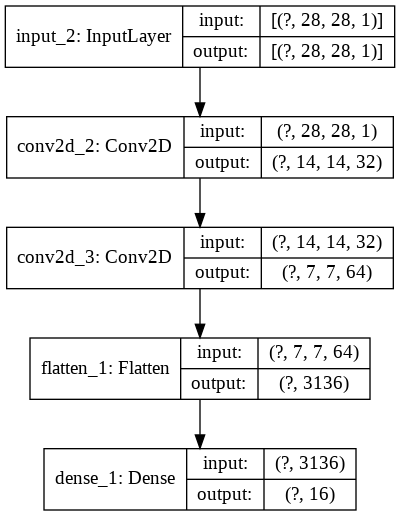

In [7]:
inputs = Input(shape=(28,28,1))
x=Conv2D(32,3,activation='relu', strides=2, padding='same')(inputs)
x=Conv2D(64,3,activation='relu', strides=2, padding='same')(x)

shape = K.int_shape(x) # x shape을 기억함. (batch, 7, 7, 64) 이때 batch size는 32
x = Flatten()(x)
latent_z = Dense(16)(x)

encoder = Model(inputs,latent_z)
encoder.summary()
plot_model(encoder,
           to_file='encoder.png',
           show_shapes=True)


In [8]:
shape

(None, 7, 7, 64)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              53312     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_____________________________________________________

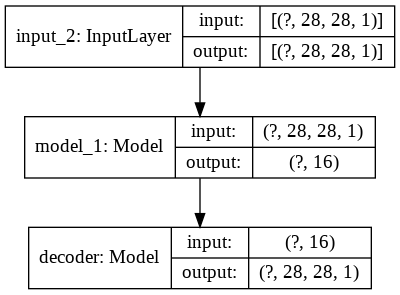

In [9]:
latent_inputs = Input(shape=(16,))
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs) # 7 7 64
x = Reshape((shape[1], shape[2], shape[3]))(x) # 4d tensor로 만듦.
x = Conv2DTranspose(64,3,activation='relu',strides=2,padding='same')(x) # stride = 2이므로, 2배로 늘어남.
x = Conv2DTranspose(32,3,activation='relu',strides=2,padding='same')(x)
x_tilde= Conv2DTranspose(1,3,activation='sigmoid',padding='same')(x) # 대칭적인 구조로, 다시 꺼내줌.

decoder = Model(latent_inputs, x_tilde, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

autoencoder = Model(inputs,
                    decoder(encoder(inputs)))
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder.png',
           show_shapes=True)


In [17]:
autoencoder=Model(inputs,decoder(encoder(inputs)))
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=10, batch_size=32) # 자기 자신이 정답.

Epoch 1/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0214 - val_loss: 0.0103
Epoch 2/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 4/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 9/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 10/10
1875/1875 [==============================] 

In [18]:
x_decoded = autoencoder.predict(x_test)


# 아래 그림을 뽑아내려고 이 작업들을 수행중.
imgs = np.concatenate([x_test[:8], x_decoded[:8]]) # 8장의 그림이 있음. 총 16장의 그림이 한 column에 깔림.
imgs.shape

(16, 28, 28, 1)

In [19]:
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs.shape

(4, 4, 28, 28)

In [22]:
np.array([np.hstack(i) for i in imgs]).shape  # 마지막 기준으로, 4개를 쌓음. 즉, 첫번째 4가 맨뒤 28에 영향을 주면서 쌓아짐. (옆으로쌓음)

(4, 28, 112)

In [23]:
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs.shape

(112, 112)

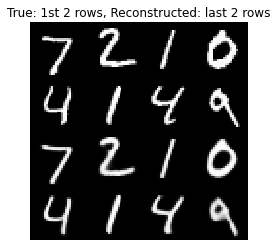

In [24]:
plt.figure()
plt.axis('off')
plt.title('True: 1st 2 rows, Reconstructed: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

# 1,2 행은 encoder (실제 이미지)
# 3,4 행은 decoder (재생)